<a href="https://colab.research.google.com/github/edineim/machine_learning/blob/main/atividade2_centroide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizado de Máquina/Atividades/EX-L05_manual-pipeline/date.csv')
df.head()

,Id,Nascimento,MP,Gols,Assis.,G-PB,PB,PT,CrtsA,CrtV,Pos.
0,1,1990,29,8,7,8,0,1,7,1,AT
1,2,1993,28,12,5,10,2,2,3,0,AT
2,3,1996,28,8,8,8,0,0,3,0,AT
3,4,1991,28,6,3,5,1,1,9,2,AT
4,5,1990,28,8,2,5,3,3,4,0,AT


In [ ]:
d = {'G': 0,'ZG': 1,'LT': 2,'LT,AT': 3,'AT': 4,'AT,LT': 5}

df['Pos.'] = df['Pos.'].map(d)
df.head()

,Id,Nascimento,MP,Gols,Assis.,G-PB,PB,PT,CrtsA,CrtV,Pos.
0,1,1990,29,8,7,8,0,1,7,1,4
1,2,1993,28,12,5,10,2,2,3,0,4
2,3,1996,28,8,8,8,0,0,3,0,4
3,4,1991,28,6,3,5,1,1,9,2,4
4,5,1990,28,8,2,5,3,3,4,0,4


In [ ]:
X = df.iloc[:, 1:10].values
X

array([[1990,   29,    8, ...,    1,    7,    1],
       [1993,   28,   12, ...,    2,    3,    0],
       [1996,   28,    8, ...,    0,    3,    0],
       ...,
       [2000,   13,    0, ...,    0,    0,    0],
       [1992,   13,    0, ...,    0,    0,    0],
       [1993,   12,    1, ...,    0,    3,    0]])

In [ ]:
y = df['Pos.'].values
y

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
from sklearn import datasets

X = df.iloc[:, :2].values # we only take the first two features.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import NearestCentroid

cn_model = NearestCentroid()
cn_model.fit(X_train_std, y_train)

cn_model.centroids_

array([[-6.36055707e-01, -8.33300560e-01],
       [ 1.16108491e+00,  1.30607179e-03],
       [-9.46907635e-02, -1.00471092e-01],
       [ 4.67384854e-01,  2.41586593e-01],
       [-1.51231663e+00, -3.54914002e-01],
       [-1.03058082e+00,  7.87678687e-01]])

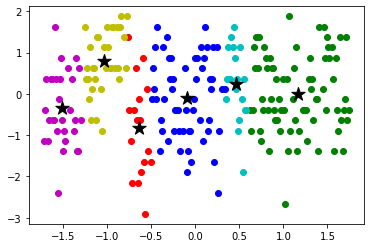

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='r')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='g')
plt.scatter(X_train_std[y_train==2, 0], X_train_std[y_train==2, 1], c='b')
plt.scatter(X_train_std[y_train==3, 0], X_train_std[y_train==3, 1], c='c')
plt.scatter(X_train_std[y_train==4, 0], X_train_std[y_train==4, 1], c='m')
plt.scatter(X_train_std[y_train==5, 0], X_train_std[y_train==5, 1], c='y')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')

In [ ]:
y_pred = cn_model.predict(X_test_std)
print(y_pred)
print(y_test)

[0 0 1 0 0 5 3 5 5 3 3 1 1 5 1 0 5 3 5 1 1 0 2 1 1 1 5 0 5 0 5 3 2 0 1 0 1
 1 2 1 5 1 2 1 1 1 5 4 3 2 0 0 4 4 1 2 3 3]
[4 0 1 0 2 5 2 5 5 2 2 1 1 5 1 2 4 1 0 1 1 4 2 1 1 1 5 2 5 2 4 3 2 2 1 0 1
 1 2 1 4 1 2 1 1 1 5 4 3 2 0 4 5 4 1 2 3 3]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7068965517241379

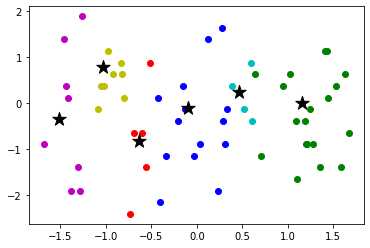

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='r')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='g')
plt.scatter(X_test_std[y_test==2, 0], X_test_std[y_test==2, 1], c='b')
plt.scatter(X_test_std[y_test==3, 0], X_test_std[y_test==3, 1], c='c')
plt.scatter(X_test_std[y_test==4, 0], X_test_std[y_test==4, 1], c='m')
plt.scatter(X_test_std[y_test==5, 0], X_test_std[y_test==5, 1], c='y')

plt.scatter(cn_model.centroids_[:,0], cn_model.centroids_[:,1], s=200, marker='*', c='k')